In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
import cv2

In [27]:
data = pd.read_csv('dress_patterns.csv')


In [4]:
data.head()

,_unit_id,category,category:confidence,image_url
0,851505458,ikat,0.3487,http://s3-eu-west-1.amazonaws.com/we-attribute...
1,851505459,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
2,851505460,polka dot,0.6709,http://s3-eu-west-1.amazonaws.com/we-attribute...
3,851505461,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
4,851505462,geometry,0.7035,http://s3-eu-west-1.amazonaws.com/we-attribute...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15702 entries, 0 to 15701
Data columns (total 4 columns):
_unit_id               15702 non-null int64
category               15702 non-null object
category:confidence    15702 non-null float64
image_url              15702 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 490.8+ KB


In [5]:
data['category'].unique()

array(['ikat', 'plain', 'polka dot', 'geometry', 'floral', 'squares',
       'scales', 'animal', 'OTHER', 'stripes', 'tribal', 'houndstooth',
       'cartoon', 'chevron', 'stars', 'letter_numb', 'skull'],
      dtype=object)

In [6]:
data['category'].value_counts()

plain          8385
floral         2776
stripes         701
polka dot       651
OTHER           513
tribal          507
squares         439
ikat            355
animal          352
geometry        342
cartoon         261
scales          112
chevron          96
letter_numb      82
houndstooth      66
stars            45
skull            19
Name: category, dtype: int64

In [24]:
import urllib.request
from PIL import Image

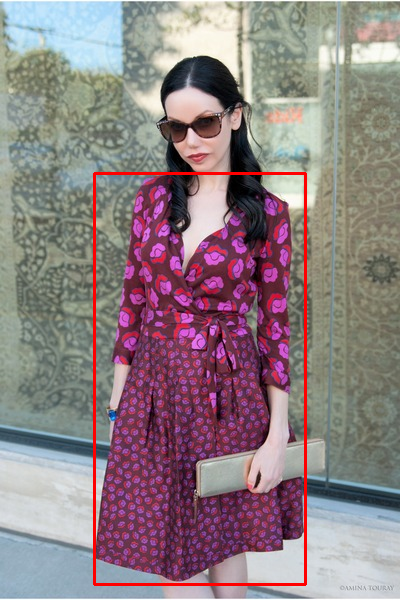

In [49]:
image = Image.open(urllib.request.urlopen(data.image_url[0]))
image

In [73]:
print(image.size)
print(image.format)
print(image.mode)

(400, 600)
PNG
RGB


In [25]:
from matplotlib import image

In [75]:
p_arr = []
l1 = []

In [76]:
for i in range(10050):
    n_1 =  image.imread(urllib.request.urlopen(data.image_url[i]))
    if n_1.shape == (600,400):
        l1.append(i)
        pass
    else:
        new = cv2.resize(n_1,(140,200))
        p_arr.append(new) 

In [77]:
data_f = np.asarray(p_arr)

In [6]:
data_f.shape

(10029, 200, 140, 3)

In [7]:
df = np.array(data['category'])

In [8]:
df

array(['ikat', 'plain', 'polka dot', ..., 'squares', 'tribal',
       'polka dot'], dtype=object)

In [9]:
df.shape

(15702,)

In [45]:
l2 = list(range(10050,15702))

In [46]:
l3 = l1+l2

In [15]:
labelsf = np.delete(df,l3)

In [16]:
labelsf.shape

(10029,)

In [23]:
labelsf[0]

'ikat'

In [17]:
type(labelsf)

numpy.ndarray

In [5]:
import tensorflow as tf
from tensorflow import keras

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [37]:
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse = False)

In [39]:
integer_encoded = label_encoder.fit_transform(labelsf)

In [22]:
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

In [24]:
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

C:\Users\lalit\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [25]:
onehot_encoded.shape

(10029, 17)

In [26]:
type(onehot_encoded)

numpy.ndarray

In [118]:
onehot_encoded[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
train_images = data_f[:8000]

In [9]:
train_images.shape

(8000, 200, 140, 3)

In [10]:
train_labels = onehot_encoded[:8000]

In [11]:
train_labels.shape


(8000, 17)

In [12]:
test_images = data_f[8000:]

In [13]:
test_labels = onehot_encoded[8000:]

In [14]:
train_images = train_images/255

In [15]:
test_images = test_images/255

In [16]:
type(train_images)

numpy.ndarray

In [17]:
type(train_labels)

numpy.ndarray

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image


Using TensorFlow backend.


In [19]:

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(200,140,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(17, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 196, 136, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 68, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 98, 68, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 64, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 32, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 47, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 43, 28, 64)       

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(train_images, train_labels, epochs=3, validation_data=(test_images, test_labels), batch_size=64)

Train on 8000 samples, validate on 2029 samples
Epoch 1/3
8000/8000 [==============================] - 619s 77ms/step - loss: 0.2726 - accuracy: 0.8974 - val_loss: 0.1917 - val_accuracy: 0.9425
Epoch 2/3
8000/8000 [==============================] - 890s 111ms/step - loss: 0.1754 - accuracy: 0.9421 - val_loss: 0.1650 - val_accuracy: 0.9425
Epoch 3/3
8000/8000 [==============================] - 642s 80ms/step - loss: 0.1631 - accuracy: 0.9458 - val_loss: 0.1457 - val_accuracy: 0.9546


In [42]:
n_1 =  image.imread(urllib.request.urlopen(data.image_url[2]))
new = cv2.resize(n_1,(140,200))
new = new/255

In [29]:
new.shape

(200, 140, 3)

In [43]:
pred = model.predict(new.reshape(1,200,140,3))

In [44]:
pred

array([[0.02116558, 0.00582662, 0.0081279 , 0.00183326, 0.1471534 ,
        0.00683215, 0.00176084, 0.01074934, 0.00162712, 0.708061  ,
        0.02987489, 0.0049935 , 0.0008029 , 0.02367362, 0.00137025,
        0.03352538, 0.01761095]], dtype=float32)

In [48]:
prediction = label_encoder.inverse_transform([np.argmax(pred[0, :])])
print(prediction)

polka dot


In [47]:
data['category'][2]

'polka dot'